## Introduction

This implementation of RBM is to draw parallels to the implementation here: https://github.com/fineline179/MEHTA_project/blob/master/codeRBM/RBM_testing.ipynb

which reflects Mehta - Schwab's paper more closely. 

For ease of comparison, all parameters in my implementations are the same as those specified by Mehta-Schwab, and hence the fineline179 implementation. The only difference should be the RBM. I use a default binary RBM model in sklearn, while fineline179 coded a similar RBM, but with L1 regularization while updating the model (which is reminiscent of what the authors did for their implementation). Sklearn's BernoulliRBM does not have L1 regularization.

In [0]:
from sklearn.neural_network import BernoulliRBM
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving outputTest30000updates20000samples.npz to outputTest30000updates20000samples (1).npz
User uploaded file "outputTest30000updates20000samples.npz" with length 6890167 bytes


In [0]:
# data source: https://github.com/fineline179/MEHTA_project/tree/master/data
uploaded.keys()

dict_keys(['outputTest30000updates20000samples.npz'])

In [0]:
import io
data_og = np.load(io.BytesIO(uploaded['outputTest30000updates20000samples.npz']))['arr_0']

In [0]:
numSamp, batchSize = data_og.shape[0], 100 # specify params for RBM 
n_v, n_h = data_og.shape[1] * data_og.shape[2], 400 # initial visible and hidden nodes for the first layer 
print (n_v, n_h)
data = np.reshape(data_og, (numSamp, n_v))
data1st = np.copy(data) # make a copy of original data for later usage.

1600 400


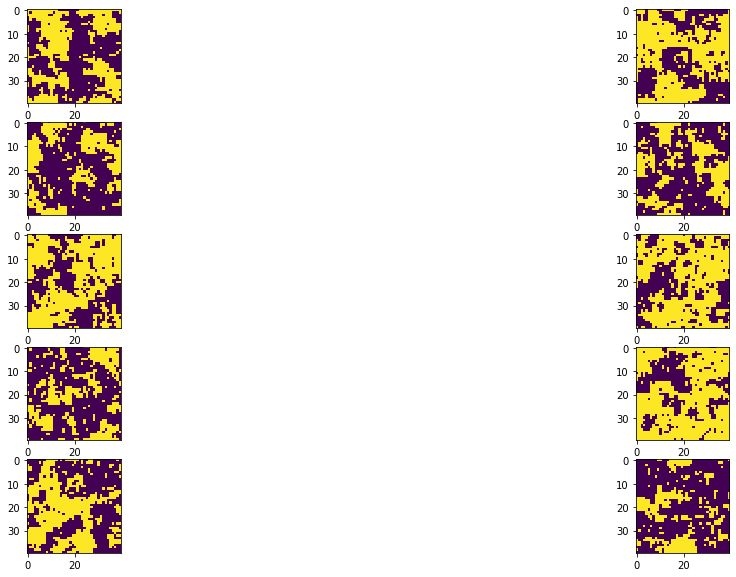

In [0]:
# visualize the first few data points from the data set -- indeed these are samples from Ising model.
fig = plt.figure(figsize=(20, 10))
for i in range(10):
  plt.subplot(5,2,i+1)
  plt.imshow(data[i].reshape((40,40)))

## First Layer (400 hidden nodes)

In [0]:
rbm1 = BernoulliRBM(n_components=n_h, batch_size=batchSize, n_iter=50, learning_rate=0.01, random_state=0, verbose=True)
data=rbm1.fit_transform(data)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1049.82, time = 9.98s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1009.07, time = 12.45s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -988.58, time = 12.40s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -960.27, time = 12.57s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -931.49, time = 12.40s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -912.76, time = 12.40s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -904.71, time = 12.33s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -896.36, time = 12.28s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -890.37, time = 12.40s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -882.82, time = 12.39s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -870.82, time = 12.52s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -862.59, time = 12.27s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -850.76, time = 12.39s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -847.82, time = 12.42s


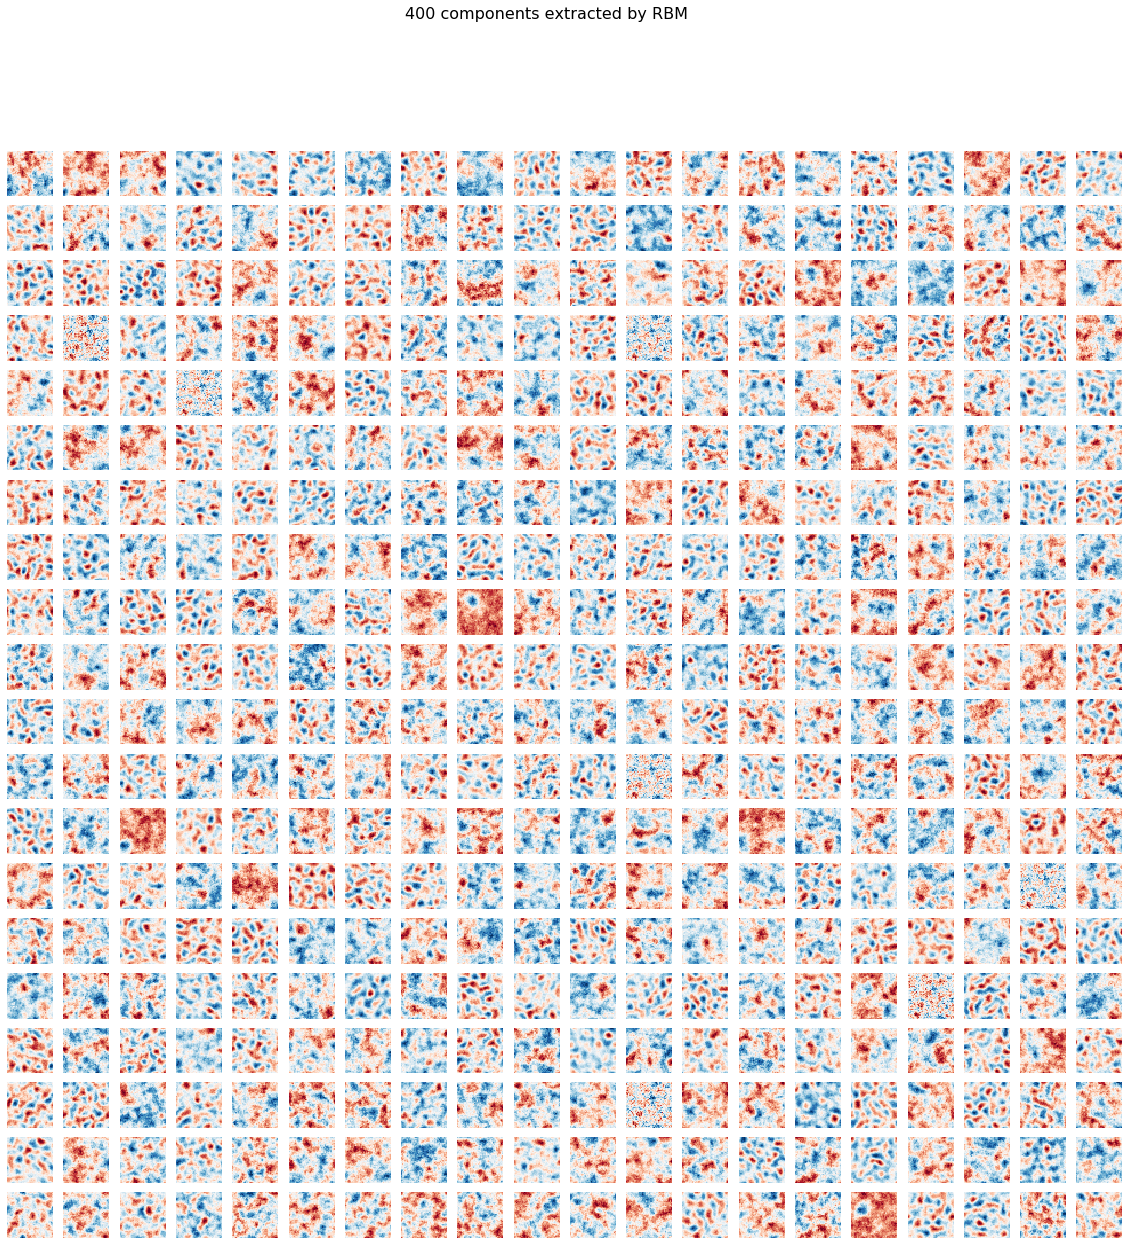

In [0]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm1.components_):
    plt.subplot(20, 20, i + 1)
    plt.imshow(comp.reshape((40, 40)), cmap=plt.cm.RdBu)
    plt.axis('off')
plt.suptitle('400 components extracted by RBM', fontsize=16);

### Observation



*   Weight distribution for each hidden node is rather random. There are some localized weight distribution (for example, (12,2), (16,3), (17,3), (20,3) in an index-1 notation system). However, most weight distributions are not clearly localized.

*   This is clearly not the same result as shown in the Mehta-Schwab paper (which shows very localized coupling behaviors).



## Second Layer (100 hidden nodes)

In [0]:
n_h = 100
rbm2 = BernoulliRBM(n_components=n_h, learning_rate=0.01, batch_size=batchSize, n_iter=50, random_state=0, verbose=True)
data = rbm2.fit_transform(data)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -205.36, time = 1.34s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -204.62, time = 1.75s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -202.88, time = 1.77s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -197.74, time = 1.77s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -189.41, time = 1.77s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -183.81, time = 1.78s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -180.66, time = 1.76s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -177.71, time = 1.78s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -174.71, time = 1.77s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -171.61, time = 1.76s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -168.76, time = 1.79s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -166.87, time = 1.77s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -165.25, time = 1.76s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -164.00, time = 1.76s
[BernoulliRBM] 

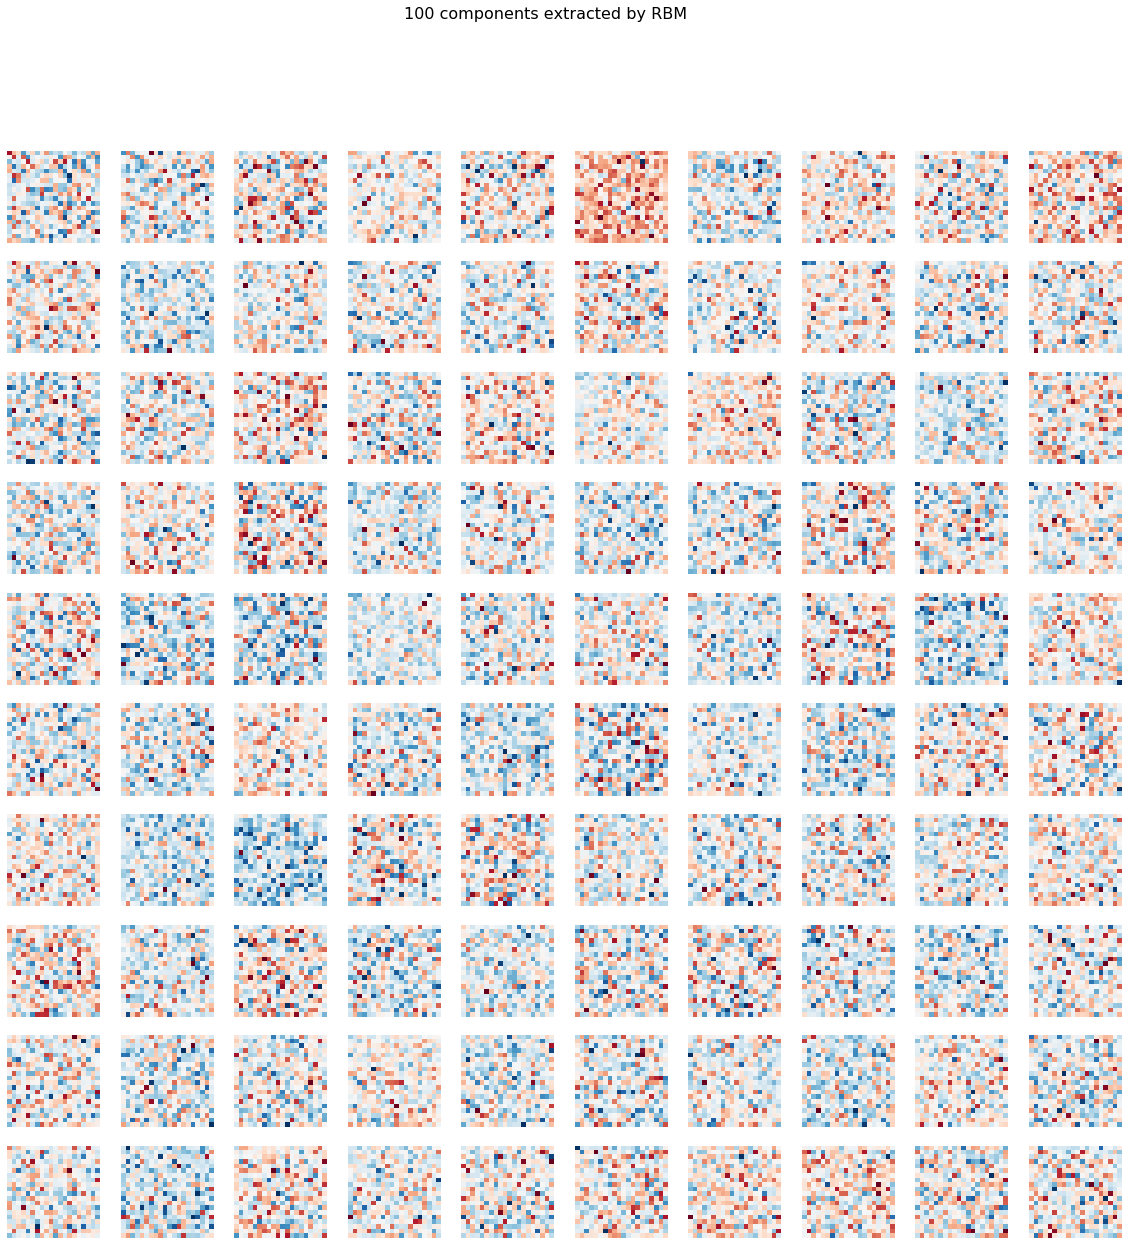

In [0]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm2.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((20, 20)), cmap=plt.cm.RdBu)
    plt.axis('off')
plt.suptitle('100 components extracted by RBM', fontsize=16);

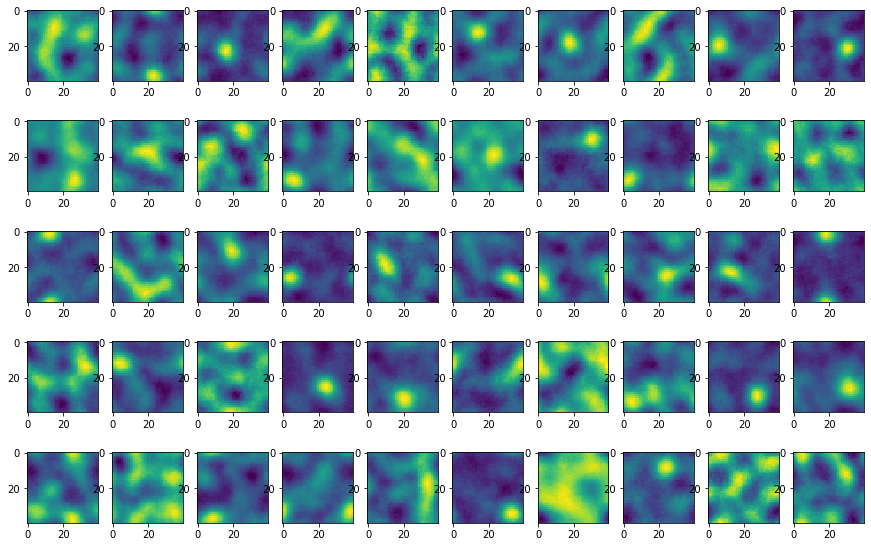

In [0]:
recept2nd = [(1 / 4e2) * np.dot(rbm2.components_[i, :], rbm1.components_) for i in range(n_h)]
plt.rcParams['figure.figsize'] = (15.0, 20.0)
for i in range(50):
    plt.subplot(10, 10, i + 1)
    plt.imshow(recept2nd[i].reshape(40, 40))
plt.show()

### Observation


*   Weights are very random as seen in the first imshow plot.
*   However, the receptive field shows signs of local influence from the first hidden layer to the second hidden layer. This is, however, not as clear as shown in Mehta-Schwab and fineline179's implementation.



## Third Layer (25 hidden nodes)

In [0]:
n_h = 25
rbm3 = BernoulliRBM(n_components=n_h, learning_rate=0.01, batch_size=batchSize, n_iter=50, random_state=0, verbose=True)
data = rbm3.fit_transform(data)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -69.19, time = 0.21s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -69.18, time = 0.33s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -69.10, time = 0.32s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -68.88, time = 0.33s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -68.28, time = 0.32s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -66.93, time = 0.33s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -64.64, time = 0.33s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -62.10, time = 0.34s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -60.03, time = 0.33s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -58.59, time = 0.32s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -57.68, time = 0.32s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -57.06, time = 0.33s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -56.60, time = 0.32s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -56.18, time = 0.34s
[BernoulliRBM] Iteration 15, 

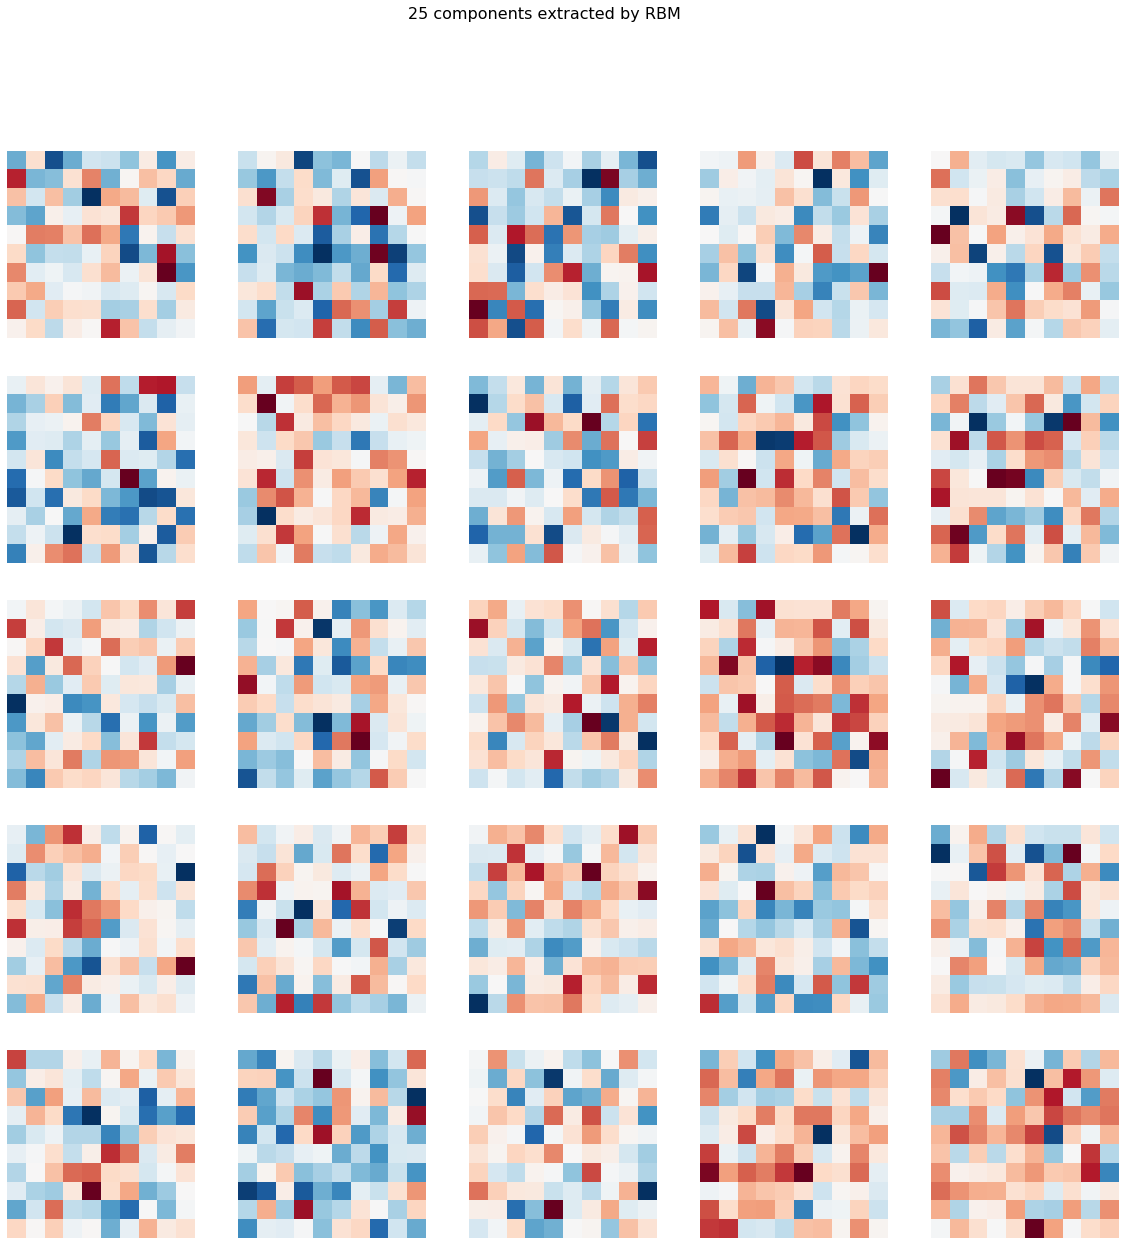

In [0]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm3.components_):
    plt.subplot(5, 5, i + 1)
    plt.imshow(comp.reshape((10, 10)), cmap=plt.cm.RdBu)
    plt.axis('off')
plt.suptitle('25 components extracted by RBM', fontsize=16);

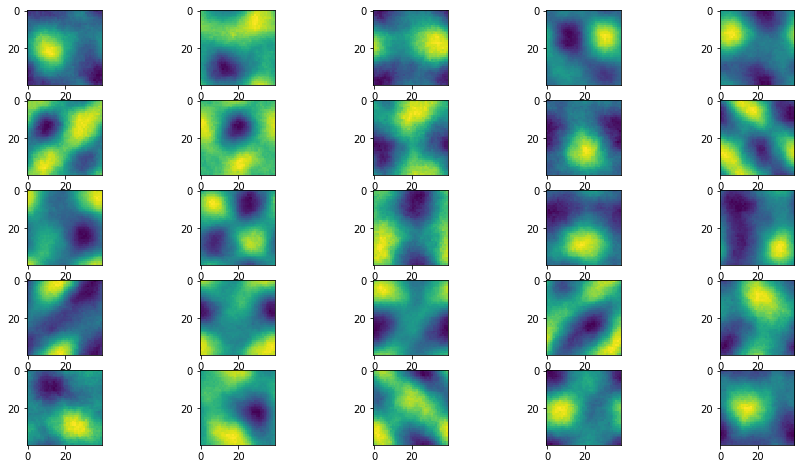

In [0]:
recept3rd = [(1 / 4e4) * np.dot(np.dot(rbm3.components_[i, :], rbm2.components_), rbm1.components_) for i
             in range(n_h)]
plt.rcParams['figure.figsize'] = (15.0, 8.0)
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(recept3rd[i].reshape(40, 40))
plt.show()

### Observation



*   Again, rather random distribution instead of localized as expected.
*   The effective receptive fields show local influences, which are clearer than in layer 2, but a but too big and with extended boundaries compared to the results in Mehta-Schwab.



## Data Reconstruction

In this section, we traverse the RBM stack from bottom up, using more hidden nodes than visible nodes to fit-transform the data back to its original size (40x40).

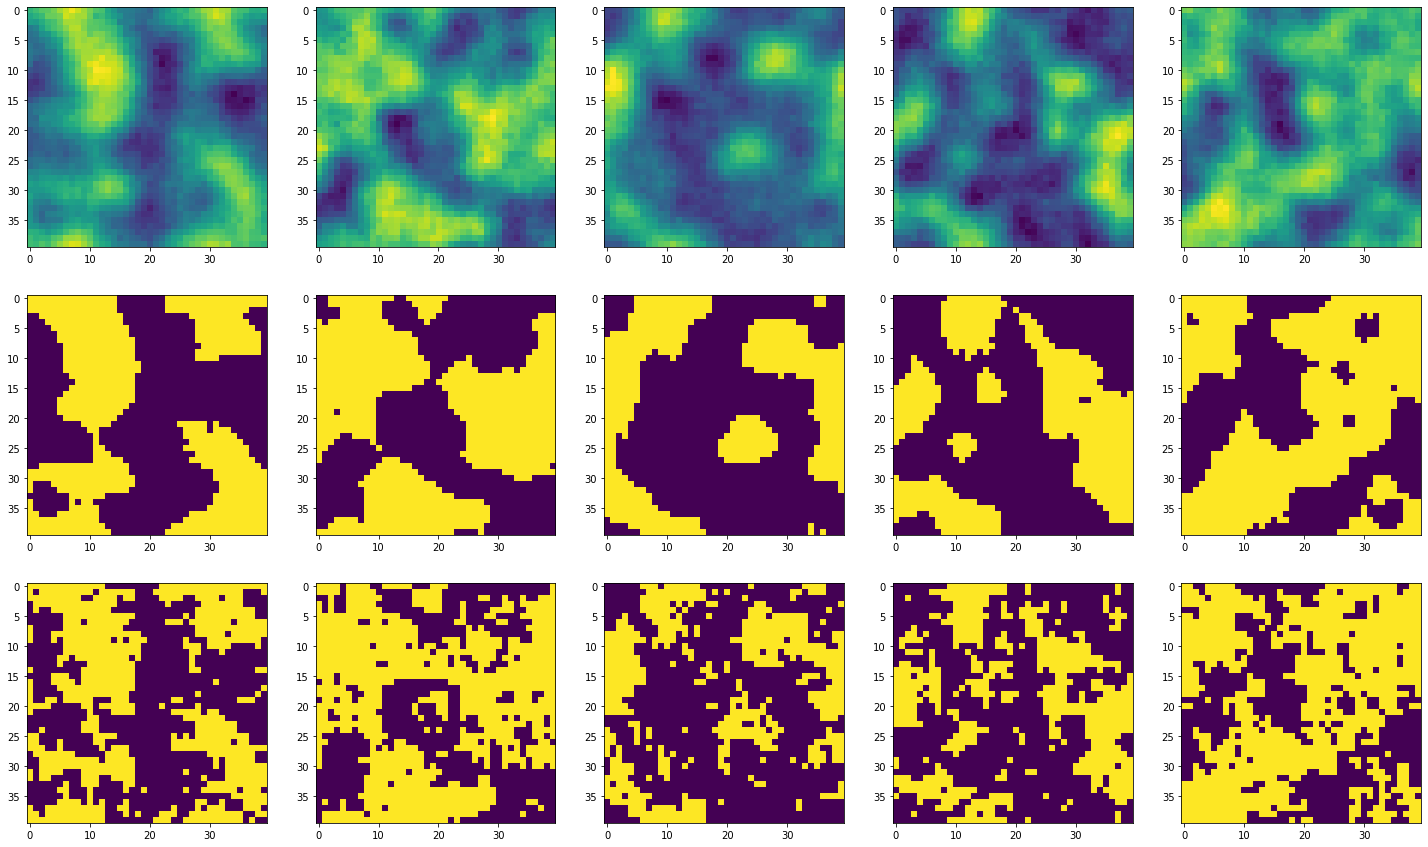

In [0]:
fig = plt.figure(figsize=(25, 15))
recon_num = 5
dataL = np.copy(data1st[:recon_num, :])

hidL1 = rbm1.transform(dataL)
hidL2 = rbm2.transform(hidL1)
hidL3 = rbm3.transform(hidL2)

dataReconONE = np.dot(rbm1.components_.T,
                      np.dot(rbm2.components_.T, rbm3.components_.T.dot(hidL3.T))).reshape((40, 40, 5))
dataReconTWO = np.dot(rbm1.components_.T, rbm2.components_.T.dot(hidL2.T)).reshape((40, 40, 5))
dataReconTHREE = rbm1.components_.T.dot(hidL1.T).reshape((40, 40, 5))

# linear combinations of reconstructed samples from each layers -- methods and parameters taken from https://github.com/fineline179/MEHTA_project/blob/master/codeRBM/RBM_testing.ipynb
# method confirmed in http://nghiaho.com/?p=1796
dataRecon = dataReconONE + 100 * dataReconTWO + 400 * 100 * dataReconTHREE


for i in range(recon_num):
  # reconstructed samples
  plt.subplot(3, recon_num, i + 1)
  plt.imshow(dataRecon[:, :, i])
  # convert reconstructed samples to binaries.
  plt.subplot(3, recon_num, i + 1 + recon_num)
  plt.imshow(dataRecon[:, :, i] > 0)
  # original samples
  plt.subplot(3, recon_num, i + 1 + 2 * recon_num)
  plt.imshow(dataL[i, :].reshape(40, 40))
plt.show()

## Commentaries

First, notice that comparing to fineline179's implementation, my implementation actually returns a better reconstruction of the data. Notice in the fourth data point, my implementation represents the two "yellow holes" in the "leftside diagonal purple patch", while fineline179's online reproduces the patch. We could either interpret this as better learning (lower information loss for the same size of hidden layers), or worse renormalization (retaining fine details that are better off discarded). Nevertheless, the big picture is that even though weight configurations at each layer is random (no localized couplings), the results are comparable.

We inspect the code differences between the two implementations to shed light on the differences in weight configurations. It turns out that Mehta and Schwab added a L1 regularization factor when updating the weights which prevent all-to-all couplings, which is what happened in my implementation. This might have also be the result of the better renormalization seen in Mehta-Schwab (because L1 regularization also reduces overfitting, which apparently is what happened to my implementation). This suspicion is confirmed in the article by Ho (2013), that shows the exactly same behavior of L1 and non-L1 RBM for a different set of image data.

However, this means that the local coupling behavior, which I believe is the central behavior that draws attention to the paper, is the result of a specification of the model, rather than a natural behavior of the model itself. Since all-to-all couplings are not possible, it makes sense that L1 regularization leads the model to do localized couplings.

Furthermore, since my all-to-all coupling model could still renormalize pretty well, it seems that renormalization (in its physical sense) is not a hard requirement to extract features from data. This invalidates the claim of the associated Wolchover (2014) article about the Mehta-Schwab paper that deep learning conducts renormalization internally as part of its learning process.

